# **Customer Churn Prediction** (Bank Customers)

**Author**: Yasmeen Rafique | Data Analytics Enthusiast  
📅 July 2025 | 📍 Pakistan

### **Introduction and Problem Statement**
Banks lose significant revenue when customers leave (churn). The goal of this project is to develop a machine learning model that can predict whether a customer will leave the bank, allowing the bank to take proactive action and improve retention.



### **Dataset Understanding**
- Dataset Name: Churn_Modelling.csv
- Source: Kaggle
- Rows: 10,000
- Columns: 14
- Target Variable: Exited (1 = Churned, 0 = Stayed)

### **Data Cleaning and Preparation**

In [2]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
# Preview the first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### **Exploratory Data Analysis (EDA)**

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


churn by gender

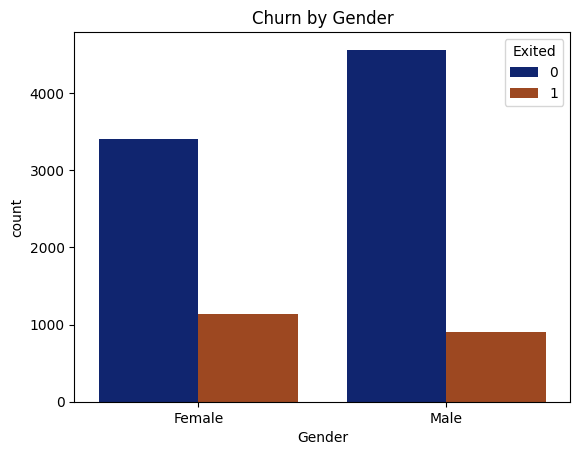

In [11]:
sns.countplot(data=df, x='Gender', hue='Exited',palette='dark')
plt.title("Churn by Gender")
plt.show()


churn by age group

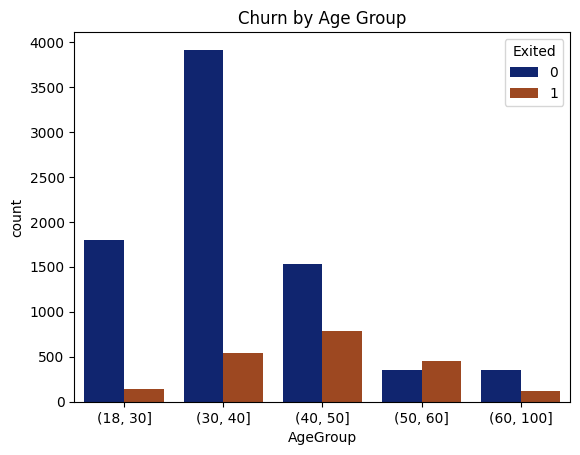

In [12]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100])
sns.countplot(data=df, x='AgeGroup', hue='Exited',palette='dark')
plt.title("Churn by Age Group")
plt.show()


In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40, 50]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40, 50]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40, 50]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(30, 40]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,"(30, 40]"
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,"(30, 40]"
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,"(30, 40]"
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,"(40, 50]"


### **Model Training and Testing**

In [14]:
# import labelencoder for converting text into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [15]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [16]:
df.columns


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'AgeGroup',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [17]:
#All columns except 'Exited' (input data)
X = df.drop('Exited',axis=1) #feature
y = df['Exited']             #arget

In [18]:
#Split 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X ,y ,test_size= 0.2, random_state= 42)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# Example: Handle interval-type columns before anything
for col in X.columns:
    if pd.api.types.is_interval_dtype(X[col]):
        X[col] = X[col].astype(str)

# One-hot encode categorical columns (optional, if any)
X = pd.get_dummies(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


C:\Users\E5400\AppData\Local\Temp\ipykernel_11960\1555419745.py:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(X[col]):


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
#make predictions
y_pred = model.predict(X_test)

### **Evaluation Metrics**

In [22]:
#measure accouracy 
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print('Report\n:',classification_report(y_test,y_pred))

Accuracy: 0.865
Report
:               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000



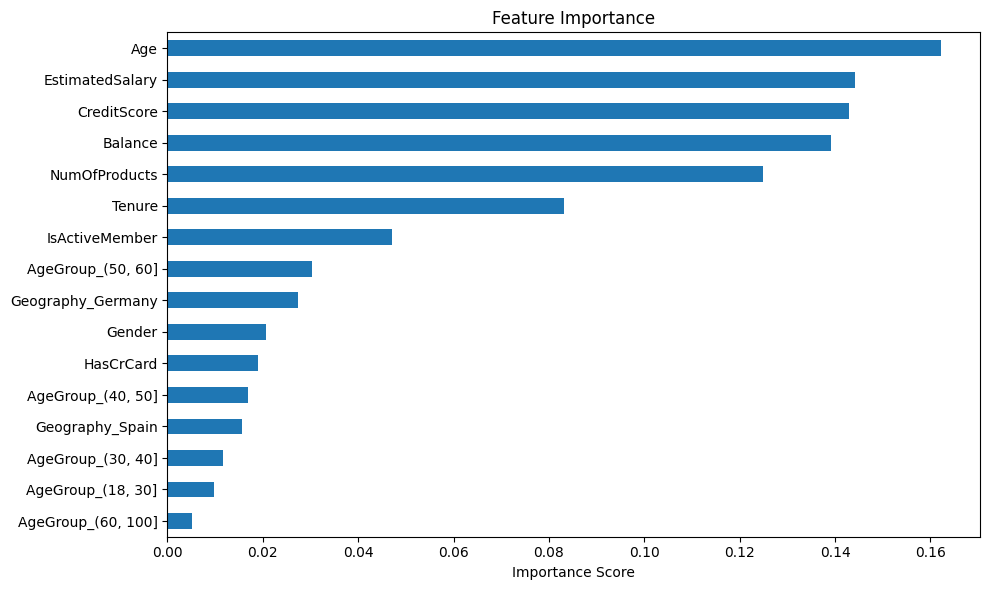

In [23]:
import matplotlib.pyplot as plt
# Create a bar chart of feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh',figsize=(10,6))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

### **Conclusion**
The model successfully predicts customer churn with around 86% accuracy using Random Forest.
Age, balance, and number of products were the top features influencing churn.

### 🙋‍♀️ About Me

I'm Yasmeen Rafique, a Data Analytics passionate about storytelling with data, automation, and building impactful things in data field.  
Connect with me on [LinkedIn](www.linkedin.com/in/yasmeen-rafique) or check out more projects on [GitHub](https://github.com/Yasmeenrafique).